# Testing Space for Reversing Transfer function Algo to produce data sets.

## Algorithm:

Define functions for $ E_1 $ and $ E_2 $. These are the electric field propagations from the Fresnel model in the air (where there would be a sample) and through the sample.  
These follow the parameter relations:  
- $ E_1(n, k, d, w) \rightarrow f(w) $ 
- $ E_2(n_1, k_1, n_2, k_2, d, w) \rightarrow \tilde{f}(w) $

This gives a model of transmission in air of thickness d with refractive index $ \tilde{n} = n + ik $.

From the Fresnel model we have the following definition for the propagation of light from a refractive index of $\tilde{n}_1$ through a medium with refractive index $\tilde{n}_2$ back into $\tilde{n}_1$.  
- $E_t = E_0 \frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} e^{i(\tilde{n}_2 \frac{wd}{c})}$   
We can apply this to our current system of reference and sample pulses with the following two equations:  
- $E_1 = E_0 e^{i(\tilde{n}_1\frac{wd}{c})}$, Here $n_2 = n_1$  
- $E_2 = E_0 \frac{4 \tilde{n}_2}{(1 + \tilde{n}_2)^2} e^{i(\tilde{n}_2 \frac{wd}{c})}$, Here $n_1 = 1$ as this is air 

NB: When $\tilde{n}_1 = \tilde{n}_2$, $\frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} = 1$

Notice, When we divide the two signals we get the theoretical transfer function used in the Newton rapshon method.  
$\tilde{H}(\omega) = \frac{E_2}{E_1} =   \frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} e^{i((\tilde{n}_2 - \tilde{n}_1) \frac{wd}{c})}$  

Important to note: In this set up:  
- k > 0 the sample attenuates 
- k < 0 the sample has gain.

In [1]:
import sys
from pathlib import Path

# Set the path to the THz-TDS root (one level up from Reverse_algo)
project_root = Path.cwd().parent  # Current working directory's parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Extraction.transfer_functions import H_th_function
from noise_generator import noise_generator

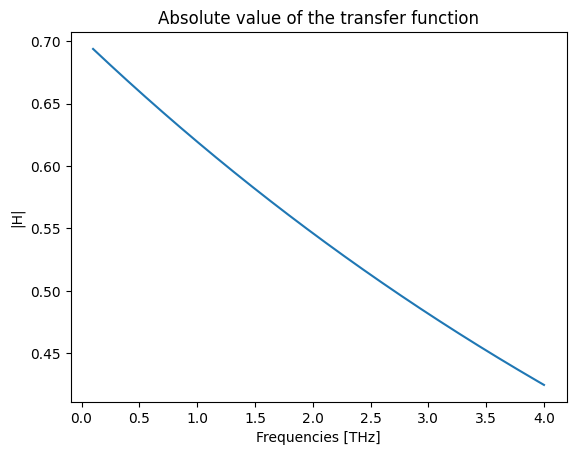

In [3]:
# Test theoretical transfer function
# set up frequency range

interp = 2**12
freqs_THz = np.linspace(0.1, 4, interp)   # 0-4 THz 
freqs = freqs_THz * 1e12
freqs_ang = freqs * 2 * np.pi

# set up other material parameters 
n = 3.4
k = -0.02
n_test = n + (k*1j)
thickness = 300 * 1e-6

# Use theoretical transfer function to generate a transfer function or defined material parameters 
H = H_th_function(n_test, freqs_ang, thickness)

plt.plot(freqs_THz, np.abs(H))
plt.title('Absolute value of the transfer function')
plt.xlabel('Frequencies [THz]')
plt.ylabel('|H|')
plt.show()

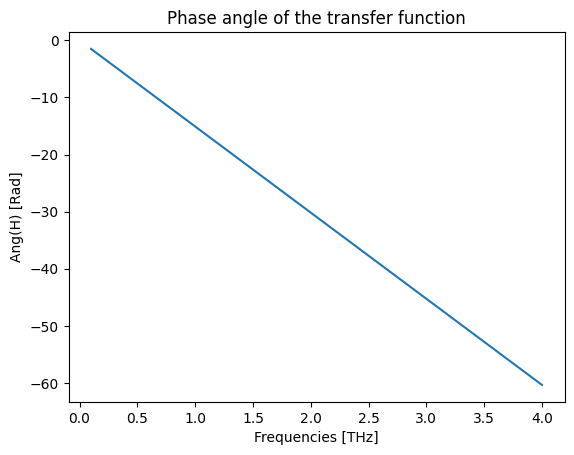

In [4]:
plt.plot(freqs_THz, np.unwrap(np.angle((H))))
plt.title('Phase angle of the transfer function')
plt.xlabel('Frequencies [THz]')
plt.ylabel('Ang(H) [Rad]')
plt.show()

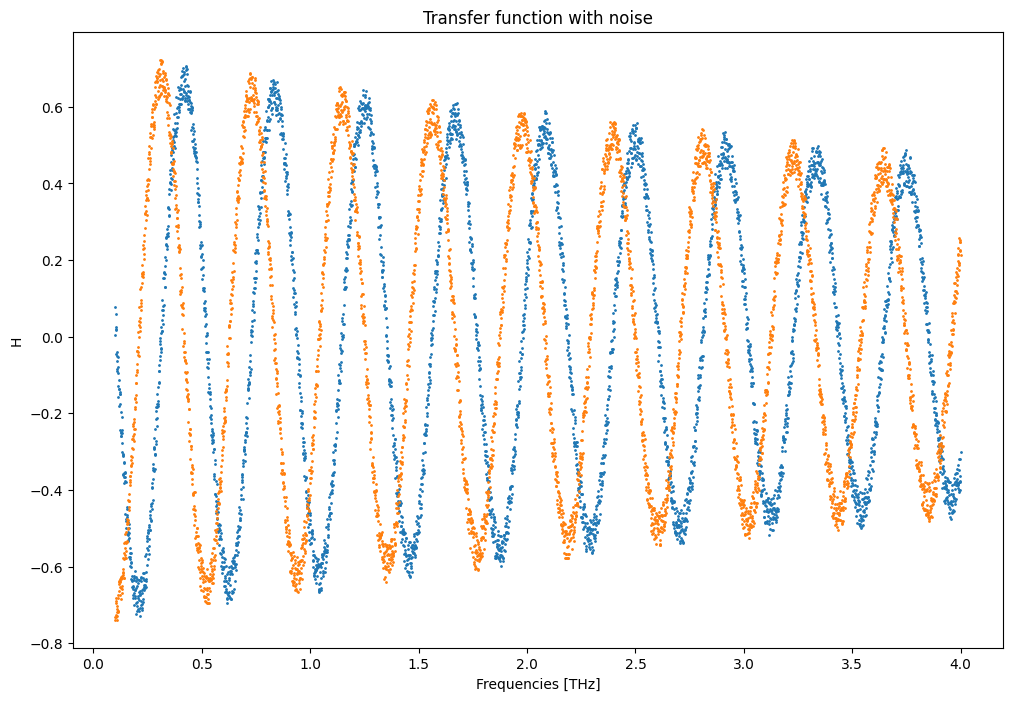

In [5]:
# add noise to the transfer function
plt.figure(figsize=(12,8))
H_exp = noise_generator(H, [-0.05-0.05j, 0.05+0.05j])

plt.scatter(freqs_THz, np.real(H_exp), s=1)
plt.scatter(freqs_THz, np.imag(H_exp), s=1)
plt.title('Transfer function with noise')
plt.xlabel('Frequencies [THz]')
plt.ylabel('H')
plt.show()

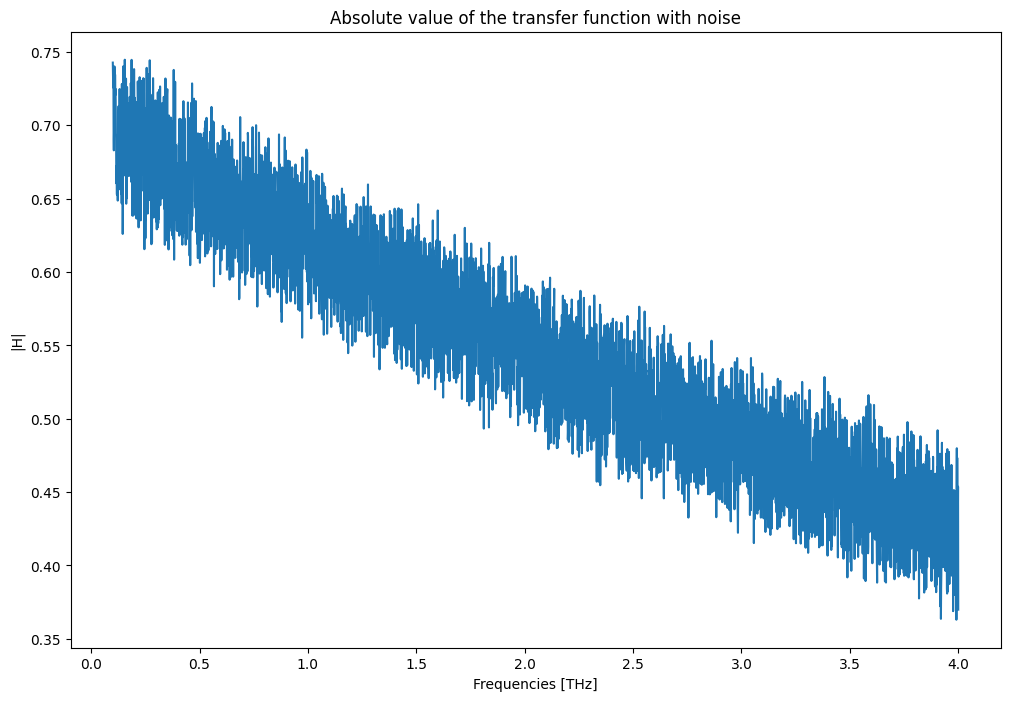

In [6]:
plt.figure(figsize=(12,8))
#plt.scatter(freqs_THz, np.abs(H_exp), s=1)
plt.plot(freqs_THz, np.abs(H_exp))
plt.title('Absolute value of the transfer function with noise')
plt.xlabel('Frequencies [THz]')
plt.ylabel('|H|')
plt.show()

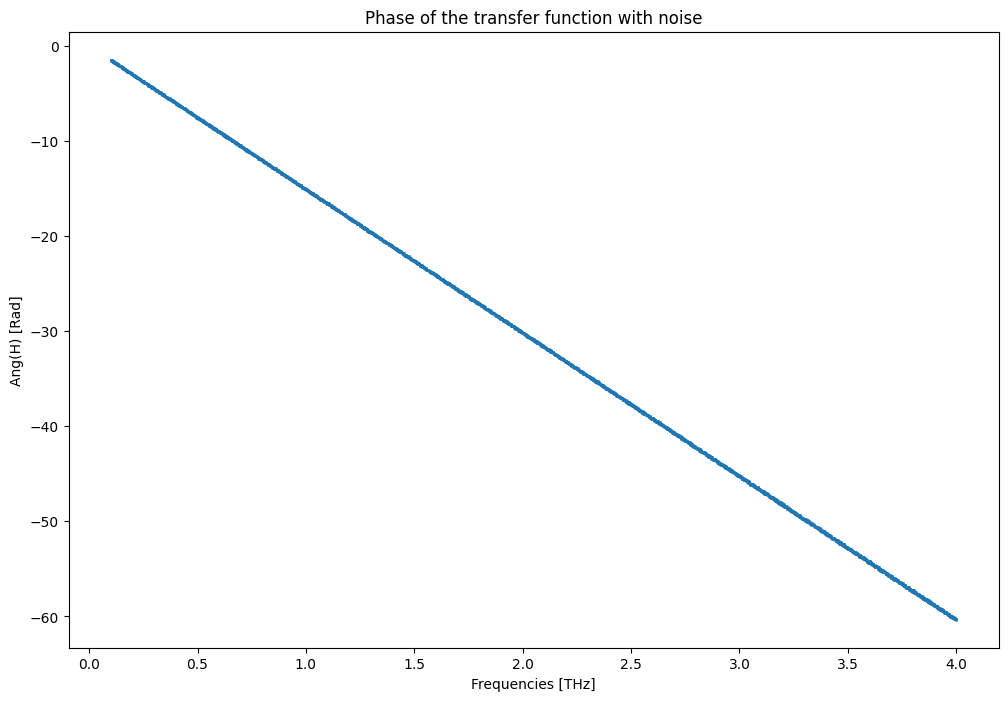

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(freqs_THz, np.unwrap(np.angle((H_exp))), s=1)
plt.title('Phase of the transfer function with noise')
plt.xlabel('Frequencies [THz]')
plt.ylabel('Ang(H) [Rad]')
plt.show()

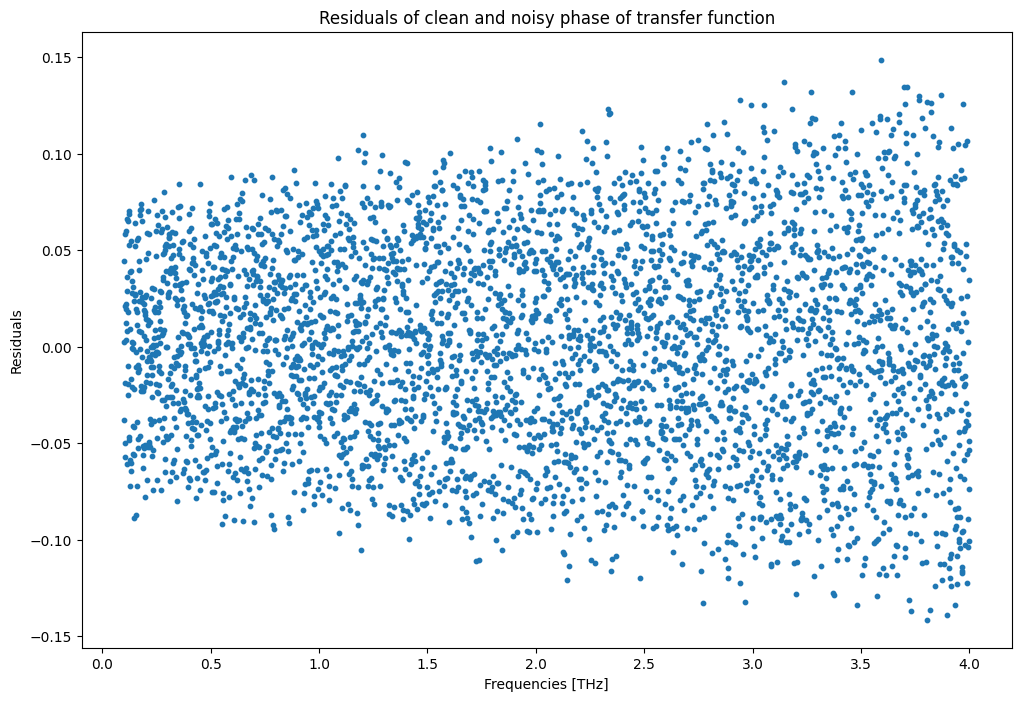

In [8]:
residuals  = np.unwrap(np.angle(H))   - np.unwrap(np.angle(H_exp))  

plt.figure(figsize=(12,8))

plt.scatter(freqs_THz, residuals, s=10)
plt.title('Residuals of clean and noisy phase of transfer function')
plt.xlabel('Frequencies [THz]')
plt.ylabel('Residuals')
plt.show()

## Dataset generation

In [9]:
import random
import pandas as pd


# Define parameter limits
n_lims = [1, 8]
k_lims = [-0.2, 0]
d_lims = [250e-6, 750e-6]

# Define significant figures for each parameter
n_sig_figs = 3
k_sig_figs = 2
d_sig_figs = 4

# Function to round to significant figures
def round_to_sig_figs(value, sig_figs):
    if value == 0:
        return 0
    return round(value, sig_figs - int(f"{value:.1e}".split('e')[1]) - 1)

# Function to generate a dataset
def generate_dataset(N):
    data = {
        "n": [],
        "k": [],
        "d": []
    }
    for _ in range(N):
        n = random.uniform(*n_lims)
        k = random.uniform(*k_lims)
        d = random.uniform(*d_lims)

        # Apply significant figures
        n = round_to_sig_figs(n, n_sig_figs)
        k = round_to_sig_figs(k, k_sig_figs)
        d = round_to_sig_figs(d, d_sig_figs)

        data["n"].append(n)
        data["k"].append(k)
        data["d"].append(d)

    return pd.DataFrame(data)

# Example usage
N = 2000  # Number of entries
dataset = generate_dataset(N)

In [10]:
dataset.head(10)

,n,k,d
0,2.62,-0.0730,0.000562
1,5.49,-0.1800,0.000464
2,1.10,-0.1000,0.000459
3,7.30,-0.2000,0.000414
4,4.87,-0.1800,0.000355
5,2.62,-0.0094,0.000617
6,6.33,-0.0220,0.000607
7,4.15,-0.0070,0.000429
8,3.06,-0.1000,0.000720
9,4.26,-0.0560,0.000336


In [11]:
print(f'DataFrame shape: {dataset.shape}')
dataset.describe()

DataFrame shape: (2000, 3)


,n,k,d
count,2000.000000,2000.000000,2000.000000
mean,4.546255,-0.100486,0.000504
std,2.027051,0.057362,0.000145
min,1.010000,-0.200000,0.000250
25%,2.800000,-0.150000,0.000379
50%,4.620000,-0.100000,0.000507
75%,6.312500,-0.050000,0.000628
max,8.000000,-0.000021,0.000750


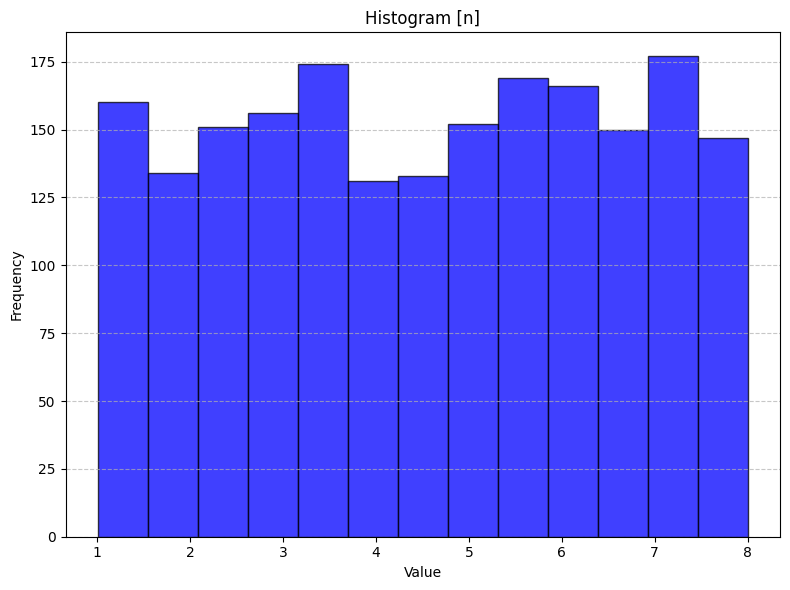

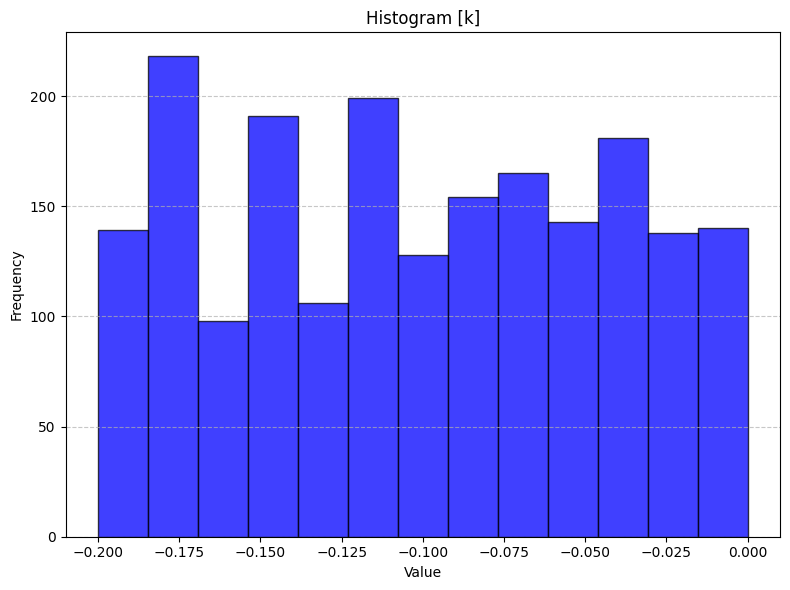

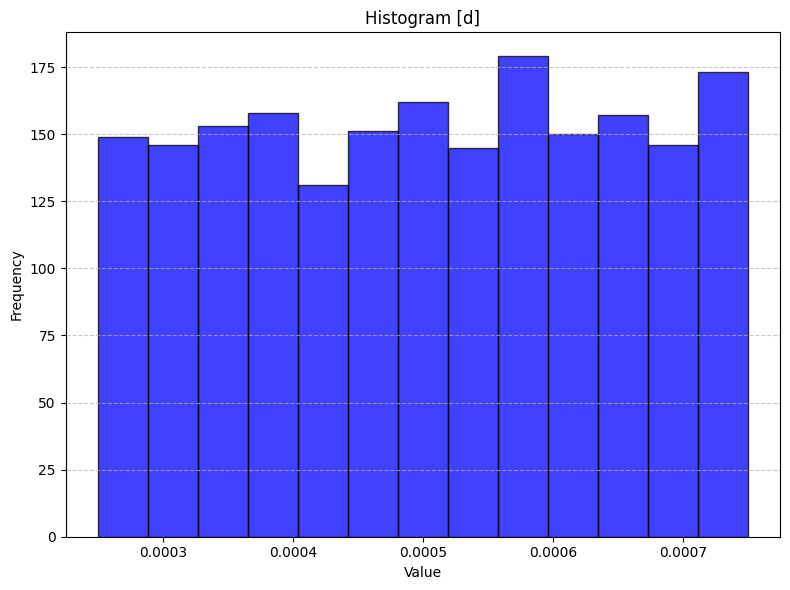

In [12]:
from plotting_utils import plot_histogram

plot_histogram(dataset['n'], 'Histogram [n]')
plot_histogram(dataset['k'], 'Histogram [k]')
plot_histogram(dataset['d'], 'Histogram [d]')

In [16]:
dataset.to_csv(f'dataset_size_{len(dataset["n"])}.csv', index=False)